# RAID Analysis

### Risks


### Assumptions


### Issues


### Dependencies




# -------------------------------------------------------------------------------

# 1. Importing required libraries and importing the data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [76]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [77]:
telecom.shape

(99999, 226)

In [78]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [79]:
og_columns = telecom.columns[telecom.columns.str.contains('og')]
og_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og

In [80]:
# Checking for zero variance outgoing columns
zero_variance_columns = telecom.loc[:,og_columns].std()[telecom.loc[:,og_columns].std()==0].index.values

zero_variance_columns

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9'],
      dtype=object)

In [81]:
# Dropping columns with zero variance
telecom.drop(list(zero_variance_columns),axis=1, inplace=True)

In [84]:
# % of null values among outgoing variables
og_columns = telecom.columns[telecom.columns.str.contains('og')]
og_columns.isnull().sum()
round(100*telecom.loc[:,og_columns].isnull().sum()/len(telecom.loc[:,og_columns]),2)


roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_6    3.94
std_og_t2m_mou_7    3.86
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_6    3.94
std_og_t2f_mou_7    3.86
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_mou_6        3.94
std_og_mou_7        3.86
std_og_mou_8        5.38
std_og_mou_9        7.75


In [86]:
# Columns with more than 70% missing values
columns_missing_data = round(100*telecom.loc[:,og_columns].isnull().sum()/len(telecom.loc[:,og_columns]),2)

columns_missing_data[columns_missing_data >= 70]

Series([], dtype: float64)

In [70]:
# replacing null values by 0 for outgoing variables
telecom.loc[:,og_columns] = telecom.loc[:,og_columns].replace(np.NaN,0)


In [72]:
# Collecting mou_outgoing variables for month 6
mou_og_columns_6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]


mou_og_columns_6


Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')

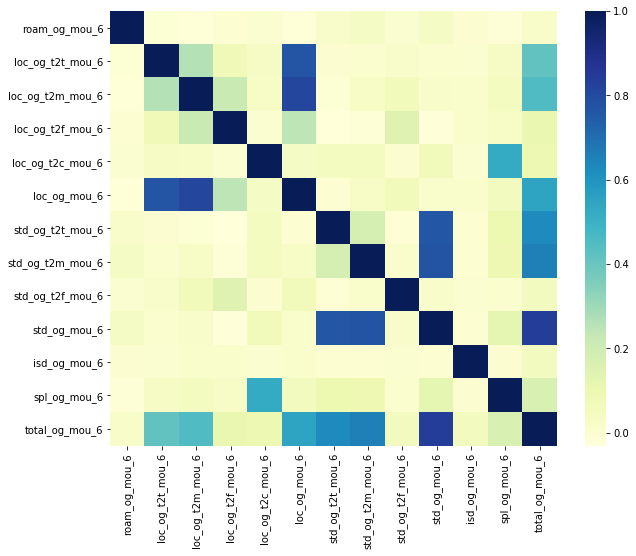

In [74]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(telecom.loc[:,mou_og_columns_6].corr(), cmap="YlGnBu")
plt.show()

After analyzing the variables we are able to build the following relationships between them.

1. total_og_mou_6 = loc_og_mou_6+std_og_mou_6+spl_og_mou_6+isd_og_mou_6+ roam_og_mou_6+og_others_6
2. std_og_mou_6 = std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6 + std_og_2tc_mou_6
3. loc_og_mou_6 = loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6 + loc_og_2tc_mou_6


In [51]:
print(telecom.loc[7,'total_og_mou_6'],telecom.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())


487.53 487.52000000000004


In [52]:
# loc_og_mou_6 is a total of the other given fields

print( \
      telecom.loc[7,'loc_og_mou_6'], \
      telecom.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum() \
     )

422.16 422.15


In [53]:
# std_og_mou_6 is a total of the other given fields

print( \
      telecom.loc[7,'std_og_mou_6'], \
      telecom.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum() \
     )


60.86 60.849999999999994


In [54]:
# As total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_og_cols = telecom.columns[telecom.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(ls_total_og_cols)

telecom.drop(ls_total_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9'],
      dtype='object')


In [55]:
#let's define good phase derived variables for all og components:
telecom['spl_og_mou_good_ph'] = (telecom.spl_og_mou_6 + telecom.spl_og_mou_7)/2
telecom['isd_og_mou_good_ph'] = (telecom.isd_og_mou_6 + telecom.isd_og_mou_7)/2
telecom['roam_og_mou_good_ph'] = (telecom.roam_og_mou_6 + telecom.roam_og_mou_7)/2
telecom['std_og_t2m_mou_good_ph'] = (telecom.std_og_t2m_mou_6 + telecom.std_og_t2m_mou_7)/2
telecom['std_og_t2t_mou_good_ph'] = (telecom.std_og_t2t_mou_6 + telecom.std_og_t2t_mou_7)/2
telecom['std_og_t2f_mou_good_ph'] = (telecom.std_og_t2f_mou_6 + telecom.std_og_t2f_mou_7)/2

telecom['loc_og_t2m_mou_good_ph'] = (telecom.loc_og_t2m_mou_6 + telecom.loc_og_t2m_mou_7)/2
telecom['loc_og_t2t_mou_good_ph'] = (telecom.loc_og_t2t_mou_6 + telecom.loc_og_t2t_mou_7)/2
telecom['loc_og_t2f_mou_good_ph'] = (telecom.loc_og_t2f_mou_6 + telecom.loc_og_t2f_mou_7)/2
telecom['loc_og_t2c_mou_good_ph'] = (telecom.loc_og_t2c_mou_6 + telecom.loc_og_t2c_mou_7)/2

In [56]:
# drop all the original og mou variables
ls_og = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

ls_og

telecom.drop(ls_og,axis=1,inplace=True)

In [57]:
# let's check summary stats for og_others 
ls_others = telecom.columns[telecom.columns.str.contains('og_others')]

telecom.loc[:,ls_others].describe()

,og_others_6,og_others_7,og_others_8,og_others_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.436277,0.029069,0.031577,0.043780
std,4.044839,2.119603,2.260134,3.491866
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,800.890000,370.130000,394.930000,787.790000


# 2. Data Analysis & EDA

# 3. PCA

# 4. Model Building

# 5. Model Evaluation